# 1. Define the problem

Predit the stress level through text processing

# 2. Gather the data

In [1]:
! pip install wordcloud

In [2]:
#import library
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
#import the data
fileLocation='C:/Users/Constance Lim/OneDrive/Learning/Learning/IOD/Project/Capstone/1. Data/7. StressDetection/Stress Detection.csv'
stresslevel=pd.read_csv(fileLocation)

In [4]:
#qucick look at the data
stresslevel.head()

,subreddit,post_id,sentence_range,text,label,syntax_fk_grade,Stress Level
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,7.910952,-0.204167


In [5]:
stresslevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subreddit        2838 non-null   object 
 1   post_id          2838 non-null   object 
 2   sentence_range   2838 non-null   object 
 3   text             2838 non-null   object 
 4   label            2838 non-null   int64  
 5   syntax_fk_grade  2838 non-null   float64
 6   Stress Level     2838 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 155.3+ KB


# 3.Data preprocessing 

In [6]:
stresslevel.shape

(2838, 7)

### Check null value

In [7]:
#check null values
stresslevel.isnull().sum() 

subreddit          0
post_id            0
sentence_range     0
text               0
label              0
syntax_fk_grade    0
Stress Level       0
dtype: int64

Let's review some of the pre-processing steps for text data:

- Convert to lower case 
- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal


### Convert to lower case + Remove special characters + Tokenizing

In [8]:
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

stresslevel['processed_text']=stresslevel['text'].apply(lambda x : tokenizer.tokenize(x.lower()))

In [9]:
stresslevel['processed_text']

0       [he, said, he, had, not, felt, that, way, befo...
1       [hey, there, r, assistance, not, sure, if, thi...
2       [my, mom, then, hit, me, with, the, newspaper,...
3       [until, i, met, my, new, boyfriend, he, is, am...
4       [october, is, domestic, violence, awareness, m...
                              ...                        
2833    [her, a, week, ago, precious, how, are, you, i...
2834    [i, don, t, have, the, ability, to, cope, with...
2835    [in, case, this, is, the, first, time, you, re...
2836    [do, you, find, this, normal, they, have, a, g...
2837    [i, was, talking, to, my, mom, this, morning, ...
Name: processed_text, Length: 2838, dtype: object

### Stop word removal

In [10]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [11]:
stresslevel['processed_text']=stresslevel['processed_text'].apply(lambda x:remove_stopwords(x))

In [12]:
stresslevel['processed_text']

0       [said, felt, way, suggeted, go, rest, trigger,...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shocked, would, knows, l...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignored, jan, happy, yea...
2834    [ability, cope, anymore, trying, lot, things, ...
2835    [case, first, time, reading, post, looking, pe...
2836    [find, normal, good, relationship, main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: processed_text, Length: 2838, dtype: object

### Lemmatizing + Stemming

In [13]:
# instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
# lemmatize tokens
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

stresslevel['processed_text']=stresslevel['processed_text'].apply(lambda x:word_lemmatizer(x))

In [15]:
stresslevel['processed_text']

0       [said, felt, way, suggeted, go, rest, trigger,...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shocked, would, know, li...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignored, jan, happy, yea...
2834    [ability, cope, anymore, trying, lot, thing, t...
2835    [case, first, time, reading, post, looking, pe...
2836    [find, normal, good, relationship, main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: processed_text, Length: 2838, dtype: object

In [16]:
# instantiate PorterStemmer
p_stemmer = PorterStemmer()

In [17]:
# Stemming
def word_stemmer(text):
    stem_text = [p_stemmer.stem(i) for i in text]
    return stem_text

stresslevel['processed_text']=stresslevel['processed_text'].apply(lambda x:word_stemmer(x))

In [18]:
stresslevel['processed_text']

0       [said, felt, way, sugget, go, rest, trigger, a...
1       [hey, r, assist, sure, right, place, post, go,...
2       [mom, hit, newspap, shock, would, know, like, ...
3       [met, new, boyfriend, amaz, kind, sweet, good,...
4       [octob, domest, violenc, awar, month, domest, ...
                              ...                        
2833    [week, ago, preciou, ignor, jan, happi, year, ...
2834    [abil, cope, anymor, tri, lot, thing, trigger,...
2835    [case, first, time, read, post, look, peopl, w...
2836    [find, normal, good, relationship, main, probl...
2837    [talk, mom, morn, said, sister, trauma, wors, ...
Name: processed_text, Length: 2838, dtype: object

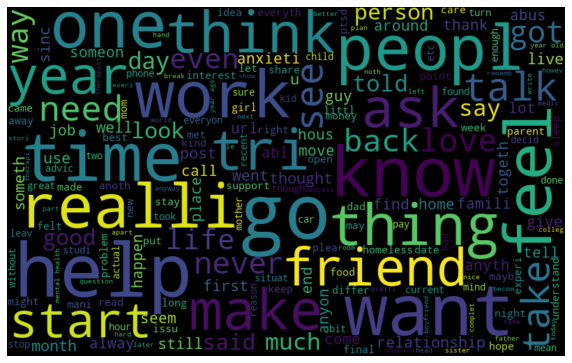

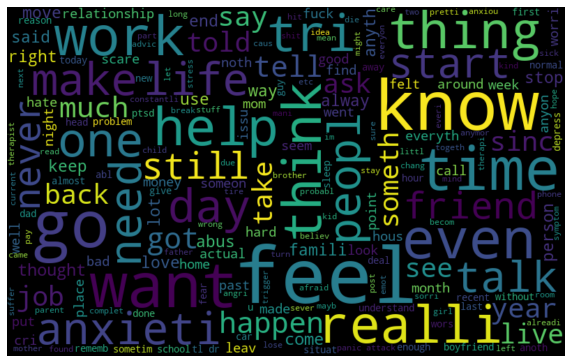

In [19]:
def create_word_cloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

stresslevel['processed_text'] = stresslevel['processed_text'].apply(lambda x: ' '.join(x))
non_stress_post_words = ' '.join([text for text in stresslevel[stresslevel['label'] == 0]['processed_text']])
stress_post_words = ' '.join([text for text in stresslevel[stresslevel['label'] == 1]['processed_text']])

create_word_cloud(non_stress_post_words)
create_word_cloud(stress_post_words)

In [20]:
stresslevel['processed_text'] 

0       said felt way sugget go rest trigger ahead you...
1       hey r assist sure right place post go current ...
2       mom hit newspap shock would know like play hit...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2833    week ago preciou ignor jan happi year preciou ...
2834    abil cope anymor tri lot thing trigger shut wo...
2835    case first time read post look peopl will comp...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine dev...
Name: processed_text, Length: 2838, dtype: object

# Create model

### (a) classify the text, stress-1, non stress-0

In [21]:
X=stresslevel["processed_text"] #.to_numpy()
y=stresslevel["label"] #.to_numpy()

In [22]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [24]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe_tvec = Pipeline ([
    
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


In [25]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_params = {
    
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__stop_words': [None,'english'],
    'tvec__ngram_range': [(1,1),(1,2)]
    
}

In [26]:
# Instantiate GridSearchCV.

gs_tvec = GridSearchCV (
                        pipe_tvec,
                        param_grid = pipe_tvec_params,
                        cv = 5
)

In [27]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [28]:
gs_tvec.score(X_train, y_train)

0.8427143608627038

In [29]:
gs_tvec.score(X_test, y_test)

0.7289220917822838

### (b) predict stress level

In [30]:
X=stresslevel["processed_text"]
y=stresslevel["Stress Level"]

In [32]:
X.shape

(2838,)

In [33]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [34]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [35]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe_tvec = Pipeline ([
    
    ('tvec', TfidfVectorizer()),
    ('lr', LinearRegression())
])


In [36]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_params = {
    
    'tvec__max_features': [2000,3000,4000,5000],
    #'tvec__stop_words': [None,'english'],
    'tvec__ngram_range': [(1,1),(1,2)]
    
}

In [37]:
# Instantiate GridSearchCV.

gs_tvec = GridSearchCV (
                        pipe_tvec,
                        param_grid = pipe_tvec_params,
                        cv = 5
)

In [38]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LinearRegression())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [39]:
gs_tvec.score(X_train, y_train)

0.9982891960528769

In [40]:
gs_tvec.score(X_test, y_test)

0.22756053640228902

In [42]:
gs_tvec.best_params_

{'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)}

TESTING

In [47]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

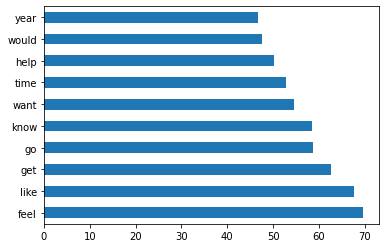

In [48]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');